In [88]:
import numpy as np
import pandas as pd
import string as st
from matplotlib import pyplot as plt
from statsmodels import api as sm
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [13]:
file='Documents\Python Scripts\Prescriber Info - Med Type .csv'
df=pd.read_csv(file)

In [14]:
df.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Total,Opioid.Prescriber,Count
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,29,0,2
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,35,1418,1,40
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,25,289,1,12
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,1757,1,44
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,17,28,0,0,0,179,0,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 258 entries, NPI to Unnamed: 257
dtypes: int64(254), object(4)
memory usage: 49.2+ MB


In [7]:
from sklearn.model_selection import train_test_split

In [9]:
# columns= ['Specialty','ABILIFY','ACETAMINOPHEN.CODEINE','ACYCLOVIR','ADVAIR','DISKUS','AGGRENOX','ALENDRONATE.SODIUM','ALLOPURINOL','ALPRAZOLAM','AMIODARONE.HCL','AMITRIPTYLINE.HCL','AMLODIPINE.BESYLATE','AMLODIPINE.BESYLATE.BENAZEPRIL','AMOXICILLIN','AMOX.TR.POTASSIUM.CLAVULANATE','AMPHETAMINE.SALT.COMBO','ATENOLOL','ATORVASTATIN.CALCIUM','AVODART','AZITHROMYCIN','BACLOFEN','BD.ULTRA.FINE.PEN.NEEDLE','BENAZEPRIL.HCL','BENICAR','BENICAR.HCT','BENZTROPINE.MESYLATE','BISOPROLOL.HYDROCHLOROTHIAZIDE','BRIMONIDINE.TARTRATE','BUMETANIDE','BUPROPION.HCL.SR','BUPROPION.XL','BUSPIRONE.HCL','BYSTOLIC','CARBAMAZEPINE','CARBIDOPA.LEVODOPA','CARISOPRODOL','CARTIA.XT','CARVEDILOL','CEFUROXIME','CELEBREX','CEPHALEXIN','CHLORHEXIDINE.GLUCONATE','CHLORTHALIDONE','CILOSTAZOL','CIPROFLOXACIN.HCL','CITALOPRAM.HBR','CLINDAMYCIN.HCL','CLOBETASOL.PROPIONATE','CLONAZEPAM','CLONIDINE.HCL','CLOPIDOGREL','CLOTRIMAZOLE.BETAMETHASONE','COLCRYS','COMBIVENT.RESPIMAT','CRESTOR','CYCLOBENZAPRINE.HCL','DEXILANT','DIAZEPAM','DICLOFENAC.SODIUM','DICYCLOMINE.HCL','DIGOX','DIGOXIN	DILTIAZEM.24HR.CD','DILTIAZEM.24HR.ER','DILTIAZEM.ER','DILTIAZEM.HCL','DIOVAN','DIPHENOXYLATE.ATROPINE','DIVALPROEX.SODIUM','DIVALPROEX.SODIUM.ER','DONEPEZIL.HCL','DORZOLAMIDE.TIMOLOL','DOXAZOSIN.MESYLATE','DOXEPIN.HCL','DOXYCYCLINE.HYCLATE','DULOXETINE.HCL','ENALAPRIL.MALEATE','ESCITALOPRAM.OXALATE','ESTRADIOL','EXELON','FAMOTIDINE','FELODIPINE.ER','FENOFIBRATE','FENTANYL','FINASTERIDE','FLOVENT.HFA','FLUCONAZOLE','FLUOXETINE.HCL','FLUTICASONE.PROPIONATE','FUROSEMIDE','GABAPENTIN','GEMFIBROZIL','GLIMEPIRIDE','GLIPIZIDE','GLIPIZIDE.ER','GLIPIZIDE.XL','GLYBURIDE,'HALOPERIDOL','HUMALOG','HYDRALAZINE.HCL','HYDROCHLOROTHIAZIDE','HYDROCODONE.ACETAMINOPHEN','HYDROCORTISONE','HYDROMORPHONE.HCL','HYDROXYZINE.HCL','IBANDRONATE.SODIUM','IBUPROFEN','INSULIN.SYRINGE','IPRATROPIUM.BROMIDE','IRBESARTAN','ISOSORBIDE.MONONITRATE.ER','JANTOVEN','JANUMET','JANUVIA','KETOCONAZOLE','KLOR.CON.10','KLOR.CON.M10','KLOR.CON.M20','LABETALOL.HCL','LACTULOSE','LAMOTRIGINE','LANSOPRAZOLE','LANTUS','LANTUS.SOLOSTAR','LATANOPROST','LEVEMIR','LEVEMIR.FLEXPEN','LEVETIRACETAM','LEVOFLOXACIN','LEVOTHYROXINE.SODIUM','LIDOCAINE','LISINOPRIL','LISINOPRIL.HYDROCHLOROTHIAZIDE','LITHIUM.CARBONATE','LORAZEPAM','LOSARTAN.HYDROCHLOROTHIAZIDE','LOSARTAN.POTASSIUM','LOVASTATIN','LOVAZA','LUMIGAN','LYRICA','MECLIZINE.HCL','MELOXICAM','METFORMIN.HCL','METFORMIN.HCL.ER','METHADONE.HCL','METHOCARBAMOL','METHOTREXATE','METHYLPREDNISOLONE','METOCLOPRAMIDE.HCL','METOLAZONE','METOPROLOL.SUCCINATE','METOPROLOL.TARTRATE','METRONIDAZOLE','MIRTAZAPINE','MONTELUKAST.SODIUM','MORPHINE.SULFATE','MORPHINE.SULFATE.ER','MUPIROCIN','NABUMETONE	NAMENDA','NAMENDA.XR','NAPROXEN','NASONEX','NEXIUM','NIACIN.ER','NIFEDICAL.XL','NIFEDIPINE.ER','NITROFURANTOIN.MONO.MACRO','NITROSTAT','NORTRIPTYLINE.HCL','NOVOLOG','NOVOLOG.FLEXPEN','NYSTATIN','OLANZAPINE','OMEPRAZOLE','ONDANSETRON.HCL','ONDANSETRON.ODT','ONGLYZA','OXCARBAZEPINE','OXYBUTYNIN.CHLORIDE','OXYBUTYNIN.CHLORIDE.ER','OXYCODONE.ACETAMINOPHEN','OXYCODONE.HCL','OXYCONTIN','PANTOPRAZOLE.SODIUM','PAROXETINE.HCL','PHENOBARBITAL','PHENYTOIN.SODIUM.EXTENDED','PIOGLITAZONE.HCL','POLYETHYLENE.GLYCOL.3350','POTASSIUM.CHLORIDE','PRADAXA','PRAMIPEXOLE.DIHYDROCHLORIDE	PRAVASTATIN.SODIUM','PREDNISONE','PREMARIN','PRIMIDONE','PROAIR.HFA','PROMETHAZINE.HCL','PROPRANOLOL.HCL','PROPRANOLOL.HCL.ER','QUETIAPINE.FUMARATE','QUINAPRIL.HCL','RALOXIFENE.HCL','RAMIPRIL','RANEXA','RANITIDINE.HCL','RESTASIS','RISPERIDONE','ROPINIROLE.HCL','SEROQUEL.XR,'SERTRALINE.HCL','SIMVASTATIN','SOTALOL','SPIRIVA','SPIRONOLACTONE','SUCRALFATE','SULFAMETHOXAZOLE.TRIMETHOPRIM	SUMATRIPTAN.SUCCINATE	SYMBICORT	SYNTHROID	TAMSULOSIN.HCL	TEMAZEPAM	TERAZOSIN.HCL	TIMOLOL.MALEATE	TIZANIDINE.HCL	TOLTERODINE.TARTRATE.ER	TOPIRAMATE	TOPROL.XL	TORSEMIDE	TRAMADOL.HCL	TRAVATAN.Z	TRAZODONE.HCL	TRIAMCINOLONE.ACETONIDE	TRIAMTERENE.HYDROCHLOROTHIAZID	VALACYCLOVIR	VALSARTAN	VALSARTAN.HYDROCHLOROTHIAZIDE	VENLAFAXINE.HCL	VENLAFAXINE.HCL.ER	VENTOLIN.HFA	VERAPAMIL.ER	VESICARE	VOLTAREN	VYTORIN	WARFARIN.SODIUM	XARELTO	ZETIA	ZIPRASIDONE.HCL	ZOLPIDEM.TARTRATE	Total	Opioid.Prescriber


In [10]:
ef= df.set_index("NPI")
dictionary={}
rows= df.shape[0] 

In [11]:
rows
row_num=0

25000

In [12]:

df['Credentials'][row_num]

'DDS'

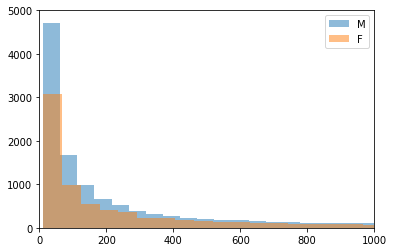

In [27]:
# df['NewCredentials'][row_num]= 'A.P.R.N'
Genders= ['M','F']
for Gender in Genders:
    plt.hist(df[df['Gender']==Gender]['Total'], bins=1000,alpha=0.5)
    plt.axis([0,1000,0,5000])
#     plt.title(Gender)
plt.legend(Genders)
plt.show()
    



In [30]:
list(st.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [42]:
df['Credentials']=df['Credentials'].str.replace('-','')
# removed .,-

In [43]:
df['Credentials']


0                 DDS
1                  MD
2                  MD
3                  MD
4                  MD
5                  DO
6                  MD
7        RN MSN ANPBC
8                  OD
9                  MD
10                 MD
11                 MD
12                 MD
13                 MD
14                 MD
15                 MD
16                 MD
17                NaN
18                 MD
19                DDS
20                 MD
21                 MD
22               ACNP
23                DPM
24                PAC
25               ARNP
26                 MD
27                 MD
28                 MD
29                DDS
             ...     
24970              MD
24971              MD
24972              MD
24973              MD
24974              MD
24975            CRNP
24976             DDS
24977              MD
24978             DDS
24979              MD
24980             DDS
24981              MD
24982              DO
24983              MD
24984     

In [33]:
df['test']

0                    DDS
1                     MD
2                     MD
3                     MD
4                     MD
5                     DO
6                     MD
7        RN, MSN, ANP-BC
8                     OD
9                     MD
10                    MD
11                    MD
12                    MD
13                    MD
14                    MD
15                    MD
16                    MD
17                   NaN
18                    MD
19                   DDS
20                    MD
21                    MD
22                  ACNP
23                   DPM
24                   PAC
25                  ARNP
26                    MD
27                    MD
28                    MD
29                   DDS
              ...       
24970                 MD
24971                 MD
24972                 MD
24973                 MD
24974                 MD
24975               CRNP
24976                DDS
24977                 MD
24978                DDS


In [44]:
Gender_dummy= pd.get_dummies(df['Gender'])

In [46]:
df=df.join(Gender_dummy)

In [47]:
df


,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Total,Opioid.Prescriber,Count,test,F,M
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,29,0,2,DDS,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,35,1418,1,40,MD,1,0
2,1427182161,F,NY,MD,General Practice,0,0,0,0,0,...,0,0,0,25,289,1,12,MD,1,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,1757,1,44,MD,0,1
4,1679650949,M,NV,MD,Hematology/Oncology,0,0,0,0,0,...,28,0,0,0,179,0,9,MD,0,1
5,1548580897,M,PA,DO,General Surgery,0,0,0,0,0,...,0,0,0,0,25,0,1,DO,0,1
6,1437192002,M,NH,MD,Family Practice,0,0,0,25,0,...,0,16,0,38,2911,1,80,MD,0,1
7,1407113988,F,PA,RN MSN ANPBC,Nurse Practitioner,0,0,0,0,0,...,0,0,0,0,198,0,10,"RN, MSN, ANP-BC",1,0
8,1023260569,M,TX,OD,Optometry,0,0,0,0,0,...,0,0,0,0,144,0,6,OD,0,1
9,1821106832,F,WI,MD,Internal Medicine,0,0,0,11,0,...,0,20,0,0,2248,1,62,MD,1,0


In [48]:
State_dummy= pd.get_dummies(df['State'])
df=df.join(State_dummy)

In [49]:
df


,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,TX,UT,VA,VI,VT,WA,WI,WV,WY,ZZ
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1427182161,F,NY,MD,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1679650949,M,NV,MD,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1548580897,M,PA,DO,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1437192002,M,NH,MD,Family Practice,0,0,0,25,0,...,0,0,0,0,0,0,0,0,0,0
7,1407113988,F,PA,RN MSN ANPBC,Nurse Practitioner,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1023260569,M,TX,OD,Optometry,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,1821106832,F,WI,MD,Internal Medicine,0,0,0,11,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:

Credentials_dummy= pd.get_dummies(df['Credentials'],prefix='M')
df=df.join(Credentials_dummy)

In [53]:
Specialty_dummy= pd.get_dummies(df['Specialty'])
df=df.join(Specialty_dummy)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019335F98>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

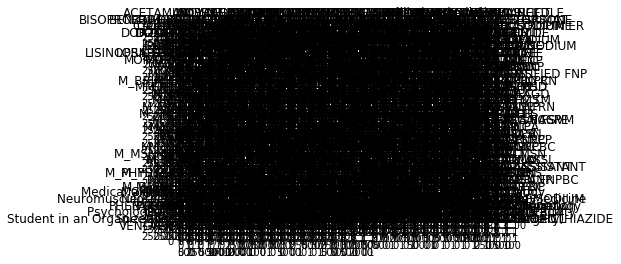

In [54]:
df.hist()

In [73]:
model=sm.Logit(df['Opioid.Prescriber'],df.drop(['NPI','Opioid.Prescriber','Gender','State','Credentials','Specialty','test','Total','Count'],axis=1))
result=model.fit(maxiter=100)
result.summary()

C:\Users\prathap.maniyur\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 100


LinAlgError: Singular matrix

In [62]:
df.drop(['Opioid.Prescriber','Gender','State','Credentials','Specialty','Total','Count'],axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 1073 entries, NPI to Vascular Surgery
dtypes: int64(251), object(1), uint8(821)
memory usage: 67.6+ MB


In [64]:
df.fillna(value=1,inplace=True)

In [66]:
df.drop(['Opioid.Prescriber','Gender','State','Credentials','Specialty','Total','Count'],axis=1).info()['dtypes']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 1073 entries, NPI to Vascular Surgery
dtypes: int64(251), object(1), uint8(821)
memory usage: 67.6+ MB


TypeError: 'NoneType' object is not subscriptable

In [68]:
pd.set_option("display.max_rows",2000)

In [71]:
df.drop(['Opioid.Prescriber','Gender','State','Credentials','Specialty','Total','Count','test'],axis=1).info(max_cols=2000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 1072 columns):
NPI                                                               25000 non-null int64
ABILIFY                                                           25000 non-null int64
ACETAMINOPHEN.CODEINE                                             25000 non-null int64
ACYCLOVIR                                                         25000 non-null int64
ADVAIR.DISKUS                                                     25000 non-null int64
AGGRENOX                                                          25000 non-null int64
ALENDRONATE.SODIUM                                                25000 non-null int64
ALLOPURINOL                                                       25000 non-null int64
ALPRAZOLAM                                                        25000 non-null int64
AMIODARONE.HCL                                                    25000 non-null int64
AMITRIPTYLINE.HCL  

In [81]:

X=df.drop(['Opioid.Prescriber','Gender','State','Credentials','test','Specialty','Total','Count'],axis=1)
y=df['Opioid.Prescriber']
X_train,X_test,y_train,Y_test=train_test_split(X,y)
lr=RandomForestClassifier()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
# Error= mean_squared_error(Y_test,y_predict)
# print("Error=",Error)


In [79]:
lr.score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [80]:
lr.oob_score

False

In [86]:
roc_auc_score(Y_test,y_predict) 

0.9483822534258163

In [89]:
confusion_matrix(Y_test,y_predict)

array([[3628,   52],
       [ 229, 2341]], dtype=int64)